In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#Totalcharges column is object(kinda string) because of the blanks present as tenure is 0(customer has just joined)should be a float, so replace blanks with 0 and change the type of totalcharges to float

In [12]:
df["TotalCharges"]= df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#isnull()-->tells us if null values are present in the datset gives true or false
#sum()--> gives the sum of each column if null is present or not, another sum() gives total of sum()


In [17]:
df.isnull().sum().sum()

0

In [18]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [21]:
df["customerID"].duplicated().sum()

0

#senior citizen column is integer, if 0 that person is not senior citizen else he is, but we need 'YES' or 'NO' to identify the senior citizen, so we wrote a function convert that takes value and checks if its 1 or 0 and returns 'yes' or 'No' accordingly

In [25]:
def convert(value):
    if value ==1:
        return "yes"
    else:
        return "no"
        
df['SeniorCitizen']= df["SeniorCitizen"].apply(convert)
    

In [30]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


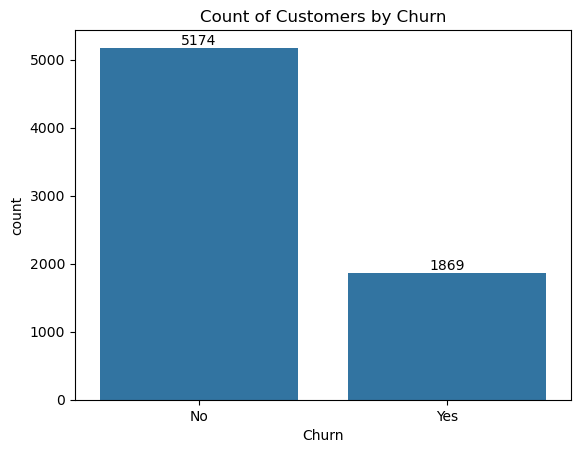

In [44]:
ax = sns.countplot(x = 'Churn',data=df) #just gives the bar chart of churn customers

ax.bar_label(ax.containers[0]) #count the numbers of churned cutomers
plt.title("Count of Customers by Churn")
plt.show()

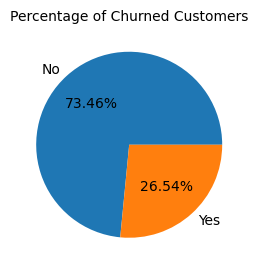

In [45]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels = gb.index,autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize=10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out. Now let's explore the reason 

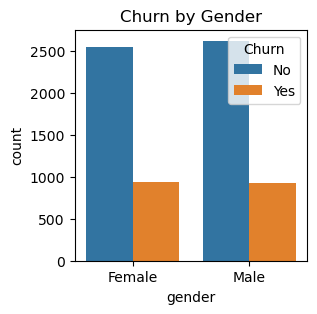

In [51]:
plt.figure(figsize =(3,3))
sns.countplot(x= df["gender"],data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

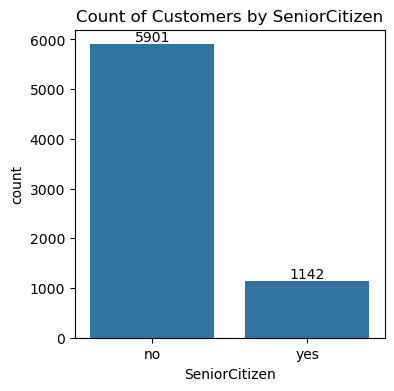

In [61]:
plt.figure(figsize =(4,4))
ax= sns.countplot(x= df["SeniorCitizen"],data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by SeniorCitizen")
plt.show()

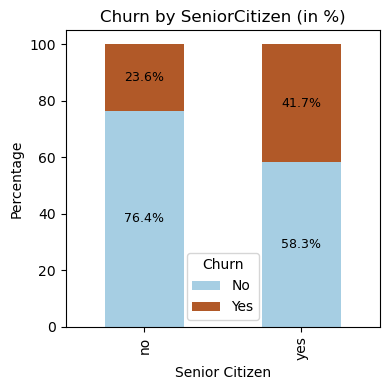

In [62]:
# Step 1: Create a crosstab for counts
cross_tab = pd.crosstab(df['SeniorCitizen'], df['Churn'])

# Step 2: Convert to percentages
percent_tab = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked bar chart
percent_tab.plot(kind='bar', stacked=True, figsize=(4, 4), colormap='Paired')

# Step 4: Add percentage labels on bars
for i, row in enumerate(percent_tab.values):
    cumulative = 0
    for j, val in enumerate(row):
        plt.text(i, cumulative + val / 2, f'{val:.1f}%', ha='center', va='center', fontsize=9)
        cumulative += val

# Step 5: Customize plot
plt.title('Churn by SeniorCitizen (in %)')
plt.ylabel('Percentage')
plt.xlabel('Senior Citizen')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

#Comparatively greater percentage of people from senior citizen category have churned 

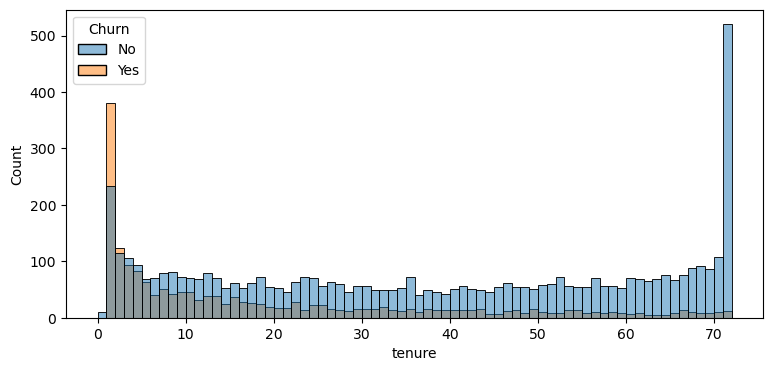

In [64]:
plt.figure(figsize =(9,4))
sns.histplot(x="tenure",data = df,bins=72, hue="Churn")
plt.show()

#People who have used our services for a long time have stayed and people who have used our services for one or two months have churned

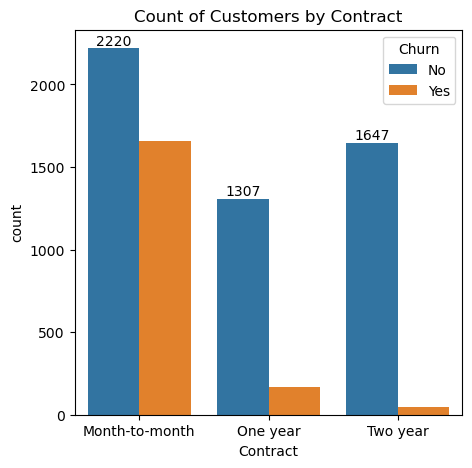

In [73]:
plt.figure(figsize =(5,5))
ax= sns.countplot(x= "Contract",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Contract")
plt.show()

#People who have month to month contarct are likely to churn from those who have one or two years of contract

In [74]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

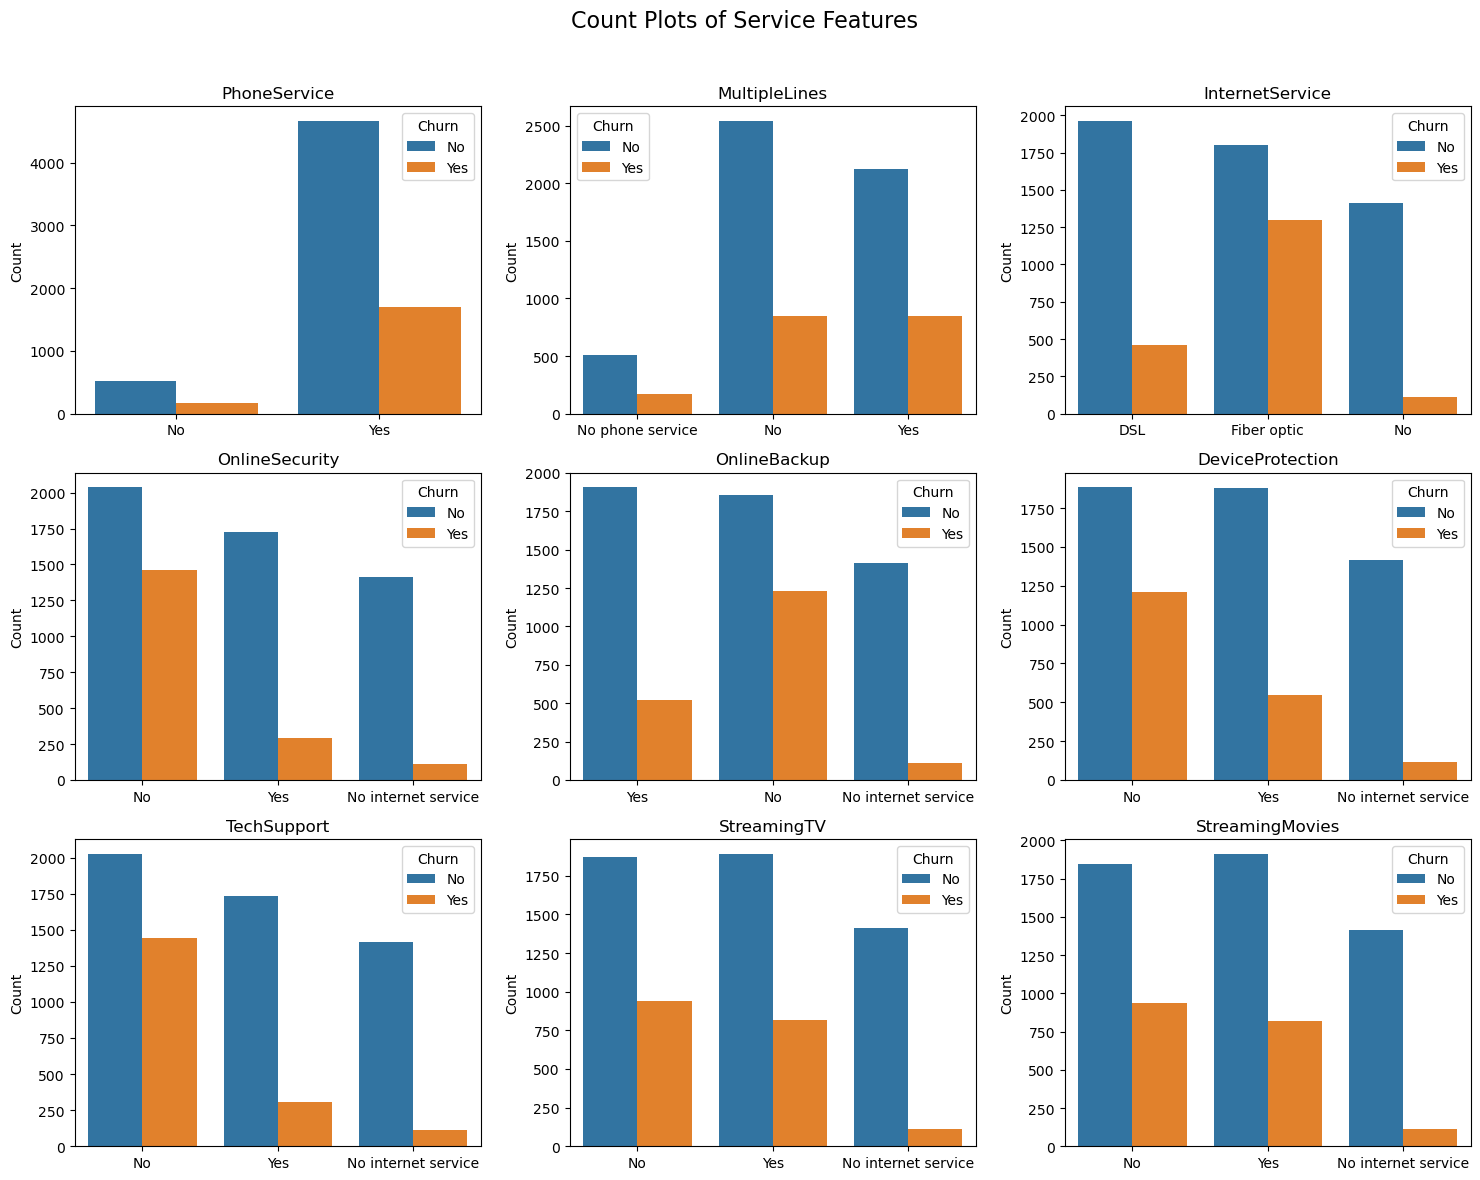

In [78]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies']
#Number of columns for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols -1) // n_cols 

# Set up the subplot grid (3 rows x 3 columns for 9 plots)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows*4))  # Adjust size as needed
fig.suptitle('Count Plots of Service Features', fontsize=16)

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through columns and axes
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue="Churn")
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Remove any unused subplots (if number of columns < grid slots)
for j in range(len(cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for suptitle
plt.show()

#The count plots show a clear pattern: customers with no additional services (like OnlineSecurity, TechSupport, or DeviceProtection) tend to have a higher churn rate. Features like PhoneService and InternetService are almost universally adopted, but lack of value-added services is associated with churn. This suggests that customers not engaged with multiple service options are more likely to leave.

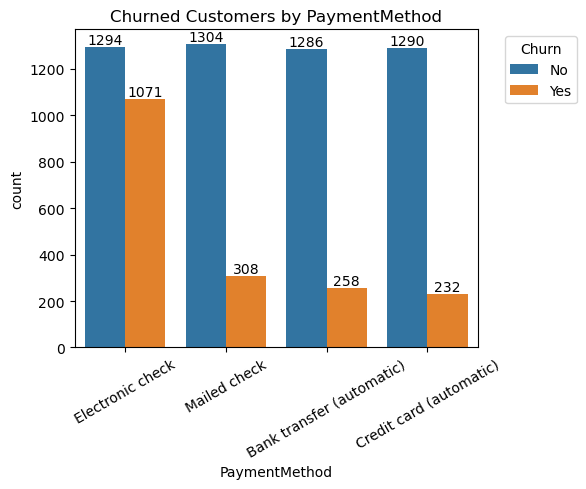

In [85]:
plt.figure(figsize =(6,5))
ax= sns.countplot(x= "PaymentMethod",data = df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by PaymentMethod")
plt.xticks(rotation=30)
plt.legend(title='Churn',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#Customer is likely to churn when he is using Electronic check as a payment method